In [1]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import shapely

#need to pip install
import altair as alt
import geopandas as gpd

alt.renderers.enable('notebook')

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Things to do:
    - Vega popup graphs
    - Time based evolution
    - Marker cluster
    - Count points in location
    - subgroups and groups
    - Make vega graphs on layers to switch between different datapoints
    - Make vega time evolution graphs
    - Integrate ipywidgets

# Open Map Files

In [2]:
saveCrimeMap = r'CrimeMap.html'
saveArrestMap = r'ArrestMap.html'

# Import Datasets

In [3]:
lapd_districts = gpd.read_file('LA_Data/LAPD_Reporting_Districts.geojson')
lapd_districts

OBJECTID  REPDIST  PREC   APREC  ... PERIMETER Shape__Area  \
0         1001      508     5  HARBOR  ...  13489.08    8.99e+06   
1         1002      509     5  HARBOR  ...  15408.61    1.21e+07   
2         1003      518     5  HARBOR  ...  16626.31    1.05e+07   
...        ...      ...   ...     ...  ...       ...         ...   
1132       998      506     5  HARBOR  ...  13918.01    1.17e+07   
1133       999      519     5  HARBOR  ...  56458.38    4.47e+07   
1134      1000      507     5  HARBOR  ...  14308.10    1.14e+07   

      Shape__Length                                           geometry  
0          13489.08  POLYGON ((-118.30892 33.81705, -118.30892 33.8...  
1          15408.61  POLYGON ((-118.30836 33.80899, -118.30892 33.8...  
2          16626.31  POLYGON ((-118.25681 33.79953, -118.25682 33.7...  
...             ...                                                ...  
1132       13918.01  POLYGON ((-118.30909 33.83724, -118.30909 33.8...  
1133       56458.38  POLYGON ((-118.25681 33.79953, -118.25654 33.7...  
1134       14308.10  POLYGON ((-118.30900 33.82564, -118.30899 33.8...  

[1135 rows x 11 columns]

In [4]:
crime_data = pd.read_csv('LA_Data/Crime_Data_from_2010_to_Present.csv')

In [5]:
arrest_data = pd.read_csv('LA_Data/Arrest_Data_from_2010_to_Present.csv')

# Drop Data We Won't Use

In [6]:
crime_data = crime_data[['DR_NO','Date Rptd','DATE OCC','TIME OCC',
                         'AREA NAME','Rpt Dist No','Crm Cd Desc',
                         'Vict Age','Vict Sex','Vict Descent','LOCATION']]

In [7]:
arrest_data = arrest_data[['Report ID', 'Arrest Date', 'Time',
                           'Area Name', 'Reporting District', 'Age',
                           'Sex Code', 'Descent Code', 'Charge Description','Location']]

# Clean Remaining Data

In [8]:
crime_data = crime_data.dropna(subset = ['Rpt Dist No'])
arrest_data = arrest_data.dropna(subset = ['Reporting District'])

# Separate Out Values to Map and Graph

In [19]:
graph_frame = crime_data.where(crime_data['Rpt Dist No'] == 519).dropna()
chart = alt.Chart(graph_frame).mark_bar().encode(alt.X('Vict Age:O',bin=alt.Bin(maxbins=25)),y = 'count(Vict Age):Q')

alt.Chart(
    graph_frame
    ).mark_bar().encode(
                    x = alt.X('Crm Cd Desc:N',
                              sort=alt.EncodingSortField(field='count(Crm Cd Desc)', op='count', order='descending')),
                    y = alt.Y('count(Crm Cd Desc):Q')
                ).transform_window(
                    rank='rank()',
                    sort=[alt.SortField('count(Crm Cd Desc)', order='descending')]
                ).transform_filter(
                        (alt.datum.rank < 10)
    )

SyntaxError: invalid syntax (<ipython-input-19-5e13dd287212>, line 4)

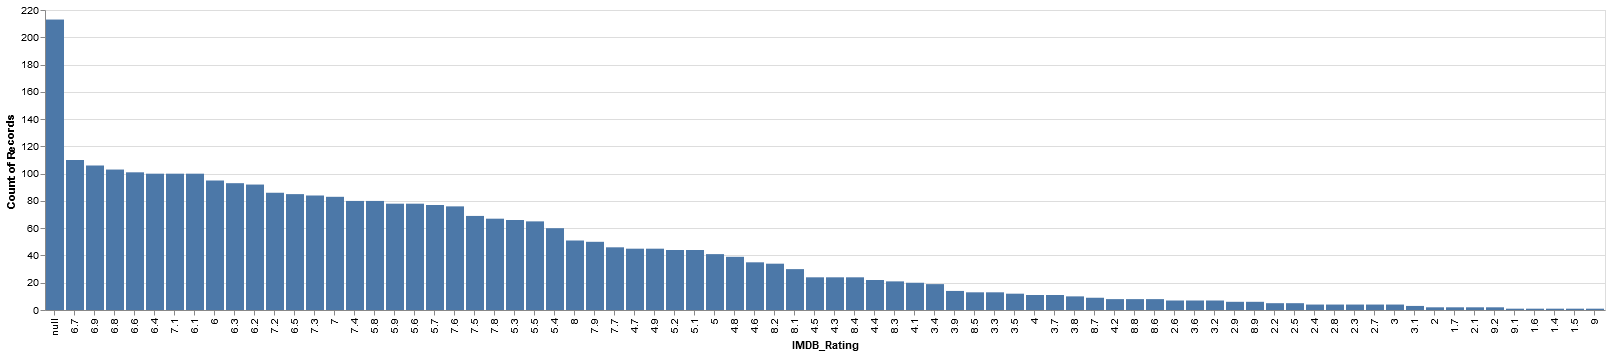

In [18]:
import altair as alt
from vega_datasets import data

source = data.movies.url

# Top 10 movies by IMBD rating
alt.Chart(
    source,
).mark_bar().encode(
    x=alt.X(
        'IMDB_Rating:N',
        sort=alt.EncodingSortField(field="IMDB_rating", op="count", order='descending')
    ),
    y=alt.Y('count(IMDB_Rating):Q')

).transform_window(
    rank='rank(count(IMDB_Rating))',
    sort=[alt.SortField('count(IMDB_Rating)', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
)

In [36]:
lacrimemap = folium.Map([34.0440386,-118.249058])
folium.Marker(
    location=[34.044,-118.249],
    popup = folium.Popup(max_width = 550).add_child(
        folium.VegaLite(chart,width = 550, height = 250))
             ).add_to(lacrimemap)
lacrimemap

In [21]:
for i in range(len(lapd_districts)):
    graph_frame = crime_data.where(crime_data['Rpt Dist No'] == REPDIST[i]).dropna()
    

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0          1307355  02/20/2010 12:00:00 AM  02/20/2010 12:00:00 AM      1350   
1         11401303  09/13/2010 12:00:00 AM  09/12/2010 12:00:00 AM        45   
2         70309629  08/09/2010 12:00:00 AM  08/09/2010 12:00:00 AM      1515   
...            ...                     ...                     ...       ...   
2070683  192004409  01/06/2019 12:00:00 AM  01/06/2019 12:00:00 AM      2100   
2070684  191716777  10/17/2019 12:00:00 AM  10/16/2019 12:00:00 AM      1800   
2070685  190805435  02/01/2019 12:00:00 AM  02/01/2019 12:00:00 AM      1615   

         ... Vict Age  Vict Sex Vict Descent  \
0        ...       48         M            H   
1        ...        0         M            W   
2        ...        0         M            H   
...      ...      ...       ...          ...   
2070683  ...       46         F            B   
2070684  ...        0       NaN          NaN   
2070685  ...       33         F            W   

                                         LOCATION  
0          300 E  GAGE                         AV  
1                 SEPULVEDA                    BL  
2         1300 E  21ST                         ST  
...                                           ...  
2070683                                       6TH  
2070684  17200    NAPA                         ST  
2070685   1700    BARRY                        AV  

[2070686 rows x 11 columns]

# Create Map and Graphs

In [ ]:
lacrimemap = folium.Map([34.0440386,-118.249058])
laarrestmap = folium.Map([34.0440386,-118.249058])

# Save Map Externally